# Create Figure 1 Notebook: EGFR

This notebooks makes figure 1. It shows the mutation type abundance for the different cancer 

In [ ]:
import cptac
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plot_utils as p


# Step 1 Create data frames with Mutation Types 

For each cancer type we need to create a df that has the mutation type for each sample 


First, load in cptac datasets

In [ ]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
lscc = cptac.Lscc()

Second, call get_geneotype_all_vars for EGFR for each cancer type. This returns a df with mutation, location, and mutation_status. 

In [3]:
endo = en.get_genotype_all_vars("EGFR")
gbm = g.get_genotype_all_vars("EGFR")
hnscc = hn.get_genotype_all_vars("EGFR")
ovar = o.get_genotype_all_vars("EGFR")
cc = c.get_genotype_all_vars("EGFR")
colon = col.get_genotype_all_vars("EGFR")
ld = l.get_genotype_all_vars("EGFR")
brca = b.get_genotype_all_vars("EGFR")
lscc = lscc.get_genotype_all_vars("EGFR")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 91 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 107 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python

# Step 2: Match Mutation Labels

The Colon data set labeled their mutations slightly differently. Nonsynonymous snv in this case is also a missense mutation. I also changed nonframeshift insertion to match In_Frame_Del formating 

In [4]:
colon["Mutation"] = colon['Mutation'].replace(['nonsynonymous SNV'], 'Missense_Mutation')

colon["Mutation"] = colon['Mutation'].replace(['nonframeshift insertion'], 'In_Frame_Insert')

# Step 3: Create figure 

Put dfs into a list. Create list of names for figure legend. 
Call plot_mutations function

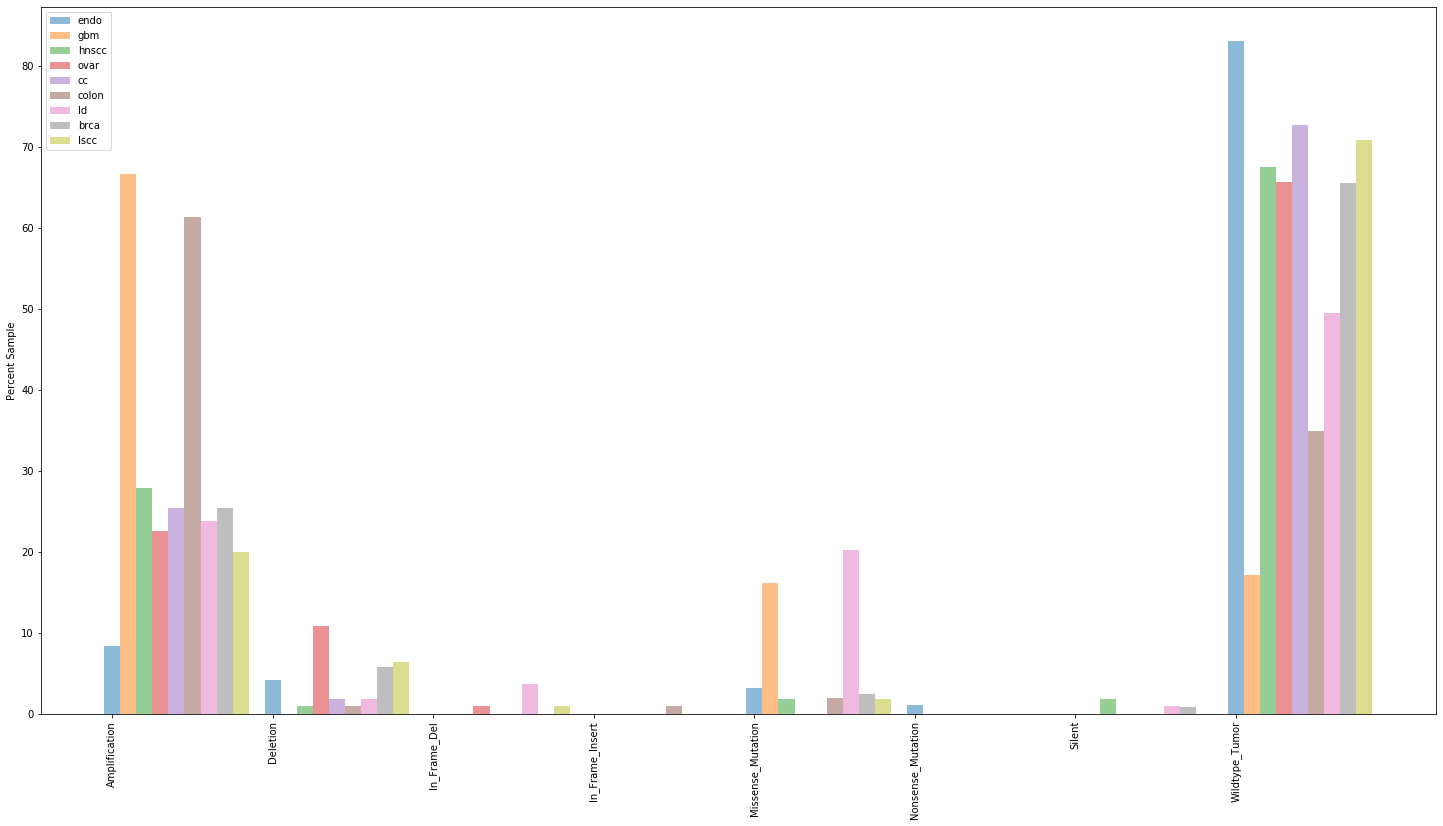

In [5]:
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
names = ['endo', 'gbm', 'hnscc', 'ovar', 'cc', 'colon', 'ld', 'brca',"lscc"]
p.figure1_plot_mutations(dfs, names, save_to_path = "Step1_EGFR.png")